In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = (SparkSession
         .builder
         .appName("Enem 2020 micro desafio final")
         .getOrCreate())

23/05/17 18:26:57 WARN Utils: Your hostname, wedivv-H110M-S2V resolves to a loopback address: 127.0.1.1; using 192.168.1.44 instead (on interface wlp5s0)
23/05/17 18:26:57 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/17 18:26:58 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
df_enem = spark.read.format("csv").option("sep", ";").option("header", True).load("./data/MICRODADOS_ENEM_2020.csv")

In [4]:
df_enem.show()

23/05/17 18:27:05 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+------------+------+---------------+-------+---------------+-----------+----------------+---------------+---------------+---------+---------+------------+----------------+-------------------+---------+---------+----------------------+------------------+---------------+------------------+--------------------+-----------+-----------+--------------+--------------+--------------+--------------+-----------+-----------+-----------+-----------+----------+----------+----------+----------+--------------------+--------------------+--------------------+--------------------+---------+--------------------+--------------------+--------------------+--------------------+-----------------+-------------+-------------+-------------+-------------+-------------+---------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|NU_INSCRICAO|NU_ANO|TP_FAIXA_ETARIA|TP_SEXO|TP_ESTADO_CIVIL|TP_COR_RACA|TP_NACIONALIDADE|TP_ST_CONCLUSAO|

1. Quantos alunos não quiseram declarar a cor/raça em 2020 (Entenda a opção “não declarado” nessa pergunta)?

In [5]:
from pyspark.sql.functions import when, col
(
    df_enem
    .select("TP_COR_RACA",
            when(col("TP_COR_RACA") == 0, "Não declarado")
            .when(col("TP_COR_RACA") == 1, "Branca")
            .when(col("TP_COR_RACA") == 2, "Preta")
            .when(col("TP_COR_RACA") == 3, "Parda")
            .when(col("TP_COR_RACA") == 4, "Amarela")
            .when(col("TP_COR_RACA") == 5, "Indígena")
            .otherwise("Unknown").alias("Cor")
            )
    .groupBy("Cor")
    .count()
).show()

+-------------+-------+
|          Cor|  count|
+-------------+-------+
|Não declarado| 116883|
|     Indígena|  37846|
|        Preta| 771740|
|      Amarela| 128522|
|       Branca|2007633|
|        Parda|2720485|
+-------------+-------+



2. Qual é o número de alunos do Sexo Feminino que estudaram em escola no estado de São Paulo?

In [6]:
(
    df_enem
    .select("SG_UF_ESC")
    .where((col("SG_UF_ESC") == "SP") & (col("TP_SEXO") == "F") )
    .groupBy("SG_UF_ESC")
    .count()
).show()

+---------+-----+
|SG_UF_ESC|count|
+---------+-----+
|       SP|91480|
+---------+-----+



3. Quantos alunos do sexo feminino que estudaram em escola no estado do Rio Grande do Sul possuem EXATAMENTE uma geladeira em casa?

In [7]:
(
    df_enem
    .select("SG_UF_ESC")
    .where((col("SG_UF_ESC") == "RS") & (col("TP_SEXO") == "F") & (col("Q012") == "B") )
    .groupBy("SG_UF_ESC")
    .count()
).show()

+---------+-----+
|SG_UF_ESC|count|
+---------+-----+
|       RS|18680|
+---------+-----+



4. Qual é o segundo estado brasileiro (considere a coluna SG_UF_ESC) em que estudaram mais alunos no ENEM 2020?

In [8]:
from pyspark.sql.functions import desc
(
    df_enem
    .select("SG_UF_ESC")
    .groupBy("SG_UF_ESC")
    .count()
    .orderBy(desc("count"))
).show()

+---------+-------+
|SG_UF_ESC|  count|
+---------+-------+
|     null|4878540|
|       SP| 167183|
|       CE| 104981|
|       MG|  71614|
|       RJ|  62583|
|       PE|  47583|
|       BA|  47235|
|       PR|  43060|
|       GO|  39769|
|       RS|  36478|
|       PA|  33109|
|       AM|  30120|
|       SC|  27373|
|       MA|  26104|
|       DF|  19840|
|       PB|  19760|
|       ES|  18419|
|       PI|  15738|
|       MT|  14674|
|       RN|  14327|
+---------+-------+
only showing top 20 rows



5. Qual é o estado brasileiro (considere a coluna SG_UF_ESC) possui o menor número de alunos cuja mãe possui ensino superior completo?

In [9]:
from pyspark.sql.functions import asc 
(
    df_enem
    .select("SG_UF_ESC")
    .where(col("Q002") == "F")
    .groupBy("SG_UF_ESC")
    .count()
    .orderBy(asc("count"))
).show()

+---------+-----+
|SG_UF_ESC|count|
+---------+-----+
|       RR|  425|
|       AC|  491|
|       AP|  494|
|       SE|  936|
|       RO| 1002|
|       TO| 1114|
|       AL| 1197|
|       PI| 1641|
|       RN| 1712|
|       MS| 1823|
|       ES| 1966|
|       PB| 2038|
|       MT| 2206|
|       AM| 2224|
|       MA| 2302|
|       PA| 3552|
|       SC| 3592|
|       DF| 3735|
|       PE| 4089|
|       GO| 4150|
+---------+-----+
only showing top 20 rows



6. Qual é o segundo estado brasileiro (considere a coluna SG_UF_ESC) que possui o maior número de pessoas na faixa “entre 26 e 30 anos”?

In [10]:
(
    df_enem
    .select("SG_UF_ESC")
    .where(col("TP_FAIXA_ETARIA") == 11)
    .groupBy("SG_UF_ESC")
    .count()
    .orderBy(desc("count"))
).show()

+---------+------+
|SG_UF_ESC| count|
+---------+------+
|     null|567071|
|       CE|  1880|
|       AM|   828|
|       SP|   580|
|       GO|   518|
|       PA|   479|
|       PE|   461|
|       RJ|   456|
|       BA|   450|
|       MG|   432|
|       PR|   221|
|       RO|   215|
|       PB|   201|
|       RS|   195|
|       SE|   183|
|       MA|   160|
|       PI|   154|
|       TO|   150|
|       RN|   121|
|       ES|   117|
+---------+------+
only showing top 20 rows



7. Qual é o estado brasileiro (considere a coluna SG_UF_ESC) que possui o TERCEIRO maior número de alunos cuja residência possui PELO MENOS 2 banheiros?

In [11]:
(
    df_enem
    .select("SG_UF_ESC")
    .where(col("Q008") == "C")
    .groupBy("SG_UF_ESC")
    .count()
    .orderBy(desc("count"))
).show()

+---------+------+
|SG_UF_ESC| count|
+---------+------+
|     null|858100|
|       SP| 49267|
|       MG| 20213|
|       RJ| 15540|
|       PR| 12686|
|       CE| 11531|
|       GO| 10441|
|       RS|  9557|
|       BA|  9022|
|       SC|  8838|
|       PE|  8181|
|       PA|  5919|
|       DF|  5605|
|       ES|  5164|
|       AM|  4392|
|       PB|  4309|
|       MT|  3972|
|       MA|  3921|
|       RN|  3883|
|       MS|  3179|
+---------+------+
only showing top 20 rows



8. Quantos alunos do sexo feminino se autodeclararam pretos?

In [12]:
from pyspark.sql.functions import when, col
(
    df_enem
    .select("TP_COR_RACA",
            when(col("TP_COR_RACA") == 0, "Não declarado")
            .when(col("TP_COR_RACA") == 1, "Branca")
            .when(col("TP_COR_RACA") == 2, "Preta")
            .when(col("TP_COR_RACA") == 3, "Parda")
            .when(col("TP_COR_RACA") == 4, "Amarela")
            .when(col("TP_COR_RACA") == 5, "Indígena")
            .otherwise("Unknown").alias("Cor")
            )
    .where((col("TP_SEXO") == "F"))
    .groupBy("Cor")
    .count()
).show()

+-------------+-------+
|          Cor|  count|
+-------------+-------+
|Não declarado|  67351|
|     Indígena|  21077|
|        Preta| 444346|
|      Amarela|  87741|
|       Branca|1197994|
|        Parda|1650296|
+-------------+-------+



9. Quantos alunos estrangeiros fizeram o ENEM 2020?

In [13]:
(
    df_enem
    .select("TP_NACIONALIDADE")
    .where(col("TP_NACIONALIDADE") == 3)
    .count()
)

8036

10. Qual é a diferença da nota média em matemática dos alunos que estudaram o ensino médio em escola pública e em escola privada?

In [23]:
from pyspark.sql.functions import avg

diff_math_pp = (
    df_enem.select("TP_ESCOLA", "NU_NOTA_MT",
                   when(col("TP_ESCOLA") == 1, "Não respondeu")
                   .when(col("TP_ESCOLA") == 2, "Pública")
                   .when(col("TP_ESCOLA") == 3, "Privada")
                   .when(col("TP_ESCOLA") == 4, "Exterior")
                   .otherwise("Unknown").alias("escola"))
    .groupBy("escola") \
    .agg(avg("NU_NOTA_MT").alias("media_matematica")) 

)

diff_math_pp.show()

+-------------+------------------+
|       escola|  media_matematica|
+-------------+------------------+
|      Privada| 610.6393569797276|
|      Pública|499.52498038446396|
|Não respondeu| 520.0334252371376|
+-------------+------------------+



In [82]:
media_matematica_publica = diff_math_pp.filter(col("escola") == "Pública").select("media_matematica").collect()[0][0]
media_matematica_privada = diff_math_pp.filter(col("escola") == "Privada").select("media_matematica").collect()[0][0]
media = media_matematica_publica - media_matematica_privada
print(f"A diferença entre a média de matemática de alunos da escola pública para privada é de {media:.2f} pontos")


A diferença entre a média de matemática de alunos da escola pública para privada é de -111.11 pontos


11. Qual é o estado brasileiro (considere a coluna SG_UF_ESC) que possui o maior número de alunos do sexo feminino indígenas?


In [106]:
(
    df_enem
    .where("TP_SEXO == 'F'" and "TP_COR_RACA == 5")
    .groupBy("SG_UF_ESC")
    .count()
    .orderBy(desc("count"))
).show()

+---------+-----+
|SG_UF_ESC|count|
+---------+-----+
|     null|32161|
|       AM|  789|
|       CE|  721|
|       SP|  561|
|       PE|  470|
|       BA|  369|
|       MG|  268|
|       PA|  267|
|       MS|  236|
|       PB|  208|
|       RJ|  204|
|       GO|  167|
|       AL|  163|
|       TO|  144|
|       ES|  130|
|       RR|  120|
|       RO|  111|
|       MA|  109|
|       PR|  106|
|       PI|   94|
+---------+-----+
only showing top 20 rows



12. Qual é a diferença entre o número de alunos cujo pai possui pós-graduação completa e o número de alunos cuja mãe possui pós-graduação completa?


In [110]:
(
    df_enem
    .where("Q001 == 'G'")
    .count()
) - (
    df_enem
    .where("Q002 == 'G'")
    .count()
    )

-194717

13. Quantos alunos cuja residência possui ATÉ 2 carros estudaram na região NORDESTE do Brasil?
Grupo de escolhas da pergunta



In [143]:
(
    df_enem
    .select("SG_UF_ESC",
            when(col("SG_UF_ESC").isin('MG', 'SP', 'ES', 'RJ'), 'Sudeste')
            .when(col("SG_UF_ESC").isin('RS', 'SC', 'PR'), 'Sul')
            .when(col("SG_UF_ESC").isin('MT', 'MS', 'GO', 'DF'), 'Centro-Oeste')
            .when(col("SG_UF_ESC").isin('AC', 'AM', 'RR', 'RO', 'PA', 'TO', 'AP'), 'Norte')
            .when(col("SG_UF_ESC").isin('MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA'), 'Nordeste')
            .otherwise("Unknown").alias("Regiao"))
    .where("Q010 == 'B' OR Q010 == 'C'") 
    .groupBy("Regiao")
    .count()
    .orderBy(desc("count"))
).show(30)

+------------+-------+
|      Regiao|  count|
+------------+-------+
|     Unknown|1784489|
|     Sudeste| 206102|
|         Sul|  79983|
|    Nordeste|  74533|
|Centro-Oeste|  51082|
|       Norte|  24683|
+------------+-------+



14. Quantos alunos que estudaram em escolas em zona rural possuem internet em casa?

In [150]:
(
    df_enem
    .where("TP_LOCALIZACAO_ESC == 2 AND Q025 = 'B'")
    .count()
)

18979

15. Qual é o nome do município que contém a SEGUNDA maior quantidade total de inscritos no ENEM 2020?

In [153]:
(
    df_enem
    .select("NO_MUNICIPIO_ESC")
    .groupBy("NO_MUNICIPIO_ESC")
    .count()
    .orderBy(desc("count"))
).show()

+----------------+-------+
|NO_MUNICIPIO_ESC|  count|
+----------------+-------+
|            null|4878540|
|       S�o Paulo|  38277|
|       Fortaleza|  27783|
|  Rio de Janeiro|  26431|
|        Bras�lia|  19840|
|          Manaus|  17120|
|  Belo Horizonte|  11826|
|          Recife|  10735|
|        Salvador|  10500|
|        Curitiba|   9868|
|           Bel�m|   9137|
|         Goi�nia|   8920|
|        S�o Lu�s|   6573|
|        Teresina|   5776|
|    Porto Alegre|   5650|
|          Macei�|   5070|
|     Jo�o Pessoa|   5005|
|    Campo Grande|   4767|
|       Guarulhos|   4689|
|           Natal|   4519|
+----------------+-------+
only showing top 20 rows



Questão 15. : pegando o exato valor, fazendo ranking

In [157]:
from pyspark.sql.window import Window
from pyspark.sql import functions as F

# Filter out rows with null value in NO_MUNICIPIO_ESC
filtered_df = df_enem.filter(df_enem.NO_MUNICIPIO_ESC.isNotNull())

# Create counts DataFrame
counts = filtered_df.groupBy("NO_MUNICIPIO_ESC").count().withColumnRenamed("count", "count")

# Create ranked DataFrame
ranked = counts.withColumn("rank", F.rank().over(Window.orderBy(F.desc("count"))))

# Filter for rank = 2
result = ranked.filter(ranked.rank == 2).select("NO_MUNICIPIO_ESC", "count")

# Show the result
result.show()


23/05/17 21:00:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/05/17 21:00:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/05/17 21:00:41 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/05/17 21:00:50 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/05/17 21:00:50 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/05/17 21:00:50 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/05/17 2

+----------------+-----+
|NO_MUNICIPIO_ESC|count|
+----------------+-----+
|       Fortaleza|27783|
+----------------+-----+



WITH counts AS (
    SELECT NO_MUNICIPIO_ESC, COUNT(*) AS count
    FROM df_enem
    GROUP BY NO_MUNICIPIO_ESC
),
ranked AS (
    SELECT NO_MUNICIPIO_ESC, count, RANK() OVER (ORDER BY count DESC) AS rank
    FROM counts
)
SELECT NO_MUNICIPIO_ESC, count
FROM ranked
WHERE rank = 2

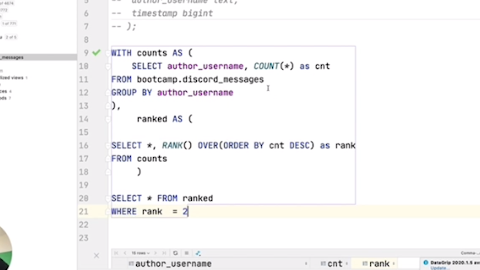